In [1]:
%pwd

'C:\\Users\\Public\\PythonScripts'

## Biblioteke

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import subprocess

## Uvod

U analizi će biti ispitan utjecaj **3 faktora**:
+ rezolucije slike
+ bitrate video zapisa iz kojege su ekstrahirane slike
+ količine uzorkovanih sličica - _"frames per second"_ 

Cilj je saznati da li promjenom ovih faktora dolazi do značajnog gubitka
informacija važnih u fazi modeliranja.

### Uvoz potrebnih slika

In [2]:
#Putanje do slika
path = 'C:\\Users\\Public\\Test_slike' #Direktorij u kojem su smještene slike
#Lista sa nazivima slika
image_name = [file for file in os.listdir(path) if file.endswith('jpg')]
image_path = [os.path.join(path, image) for image in image_name]
print(image_path)

['C:\\Users\\Public\\Test_slike\\GH010007_2.jpg', 'C:\\Users\\Public\\Test_slike\\GH010007_3.jpg', 'C:\\Users\\Public\\Test_slike\\GH010007_4.jpg', 'C:\\Users\\Public\\Test_slike\\GH010007_5.jpg', 'C:\\Users\\Public\\Test_slike\\GH010007_6.jpg', 'C:\\Users\\Public\\Test_slike\\GH010007_7.jpg', 'C:\\Users\\Public\\Test_slike\\GH010007_8.jpg', 'C:\\Users\\Public\\Test_slike\\GH010007_9.jpg', 'C:\\Users\\Public\\Test_slike\\GH010007_91.jpg']


Oznaka rezolucije slike:
* high -> 938 x 564
* medium -> 640 x 384
* low -> 320 x 192

Oznaka bitrate-a slike:
* B1 -> 2.5 Mbps
* B2 -> 1.5 Mbps
* B3 -> 1.1 Mbps

In [15]:
#Lista oznaka rezolucija i bitrate-ova
rezolucije = ['high'] * 3 + ['medium'] * 3 + ['low'] * 3
bi_rate = ['B1', 'B2', 'B3'] * 3

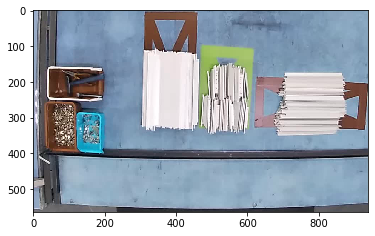

In [30]:
#Učitavanje slika i dodjeljivanje oznake rezolucije i bitrate-a
images = {}
for image, rez, br in zip(image_path, rezolucije, bi_rate):
    images[rez, br] = cv2.imread(image)

#Prikaz jedne od slika, u slučaju da promjeniš tip iz uint8(integera) u float32(realni broj)
#obavezno je napraviti standardizaciju sa 255, kako bi dobili raspon vrijednosti od [0,1] inače
#sliku nije moguće prikazati, alternativno ostavi u integeru i ne mijenjaj raspon
plt.imshow(images[('high', 'B1')].astype(np.float32)/255.)

**Q1:** Koliko se mijenja težina slika u Mb u slučaju promjene tipa podataka iz `uint 8` u `float32`?

In [42]:
#Za jednu sliku napravi promjenu tipa
q1=images['high','B1']
q1_uint8 = q1.astype(np.uint8)
q1_float32 = q1.astype(np.float32)

#Težine slika
weight_integer = q1_uint8.nbytes / 1e06
weight_float = q1_float32.nbytes / 1e06
print("Težina slike spremljene u 'uint8' formatu: ",weight_integer, ' Mb')
print("Težina slike spremljene u 'float32' formatu: ",weight_float, ' Mb')


Težina slike spremljene u 'uint8' formatu:  1.587096  Mb
Težina slike spremljene u 'float32' formatu:  6.348384  Mb


4.0

Zaključak je da je težina datoteke u slučaju primjene `float32` formata **4x** teže od one u `uint8` formatu.

**Q2:** Da li se razlikuju podatci slike u različitim podatkovnim formatima?

In [45]:
#Uzmi slike iz pitanja jedan i pogledaj njihovu razliku
np.sum(q1_uint8 - q1_float32)

0.0

Zaključak je da nema nikakvih razlika, barem na *prvu*, tj. sve dok su vrijednosti cjelobrojne.

**Q3:** Da li postoji razlika između slika koje su izvučene iz video zapisa sa različitim bitrate-ovima?

In [77]:
#Uzmi tri slike koje imaju "high" rezoluciju ali različiti bitrate
q3_images = [images[key] for key in images.keys() if key[0].startswith('h')]
print("Razlika po pixelu između 1 i 2 slike: ", np.sum(q3_images[0] - q3_images[1])/q3_images[0].size)
print("Razlika po pixelu između 2 i 3 slike: ", np.sum(q3_images[1] - q3_images[2])/q3_images[0].size)
print("Razlika po pixelu između 3 i 1 slike: ", np.sum(q3_images[2] - q3_images[0])/q3_images[0].size)

Razlika po pixelu između 1 i 2 slike:  96.20336009920005
Razlika po pixelu između 2 i 3 slike:  107.23194438143628
Razlika po pixelu između 3 i 1 slike:  101.43951090545248


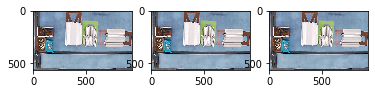

In [76]:
f,ax = plt.subplots(1,3)
for idx, image in enumerate(q3_images):
    ax[idx].imshow(image)

In [79]:
#Uzmi tri slike koje imaju "medium" rezoluciju ali različiti bitrate
q3_images = [images[key] for key in images.keys() if key[0].startswith('m')]
print("Razlika po pixelu između 1 i 2 slike: ", np.sum(q3_images[0] - q3_images[1])/q3_images[0].size)
print("Razlika po pixelu između 2 i 3 slike: ", np.sum(q3_images[1] - q3_images[2])/q3_images[0].size)
print("Razlika po pixelu između 3 i 1 slike: ", np.sum(q3_images[2] - q3_images[0])/q3_images[0].size)

Razlika po pixelu između 1 i 2 slike:  92.05926242404514
Razlika po pixelu između 2 i 3 slike:  99.2154039171007
Razlika po pixelu između 3 i 1 slike:  96.19825032552083


In [86]:
#Uzmi tri slike koje imaju "low" rezoluciju ali različiti bitrate
q3_images = [images[key] for key in images.keys() if key[0].startswith('l')]
print("Razlika po pixelu između 1 i 2 slike: ", (np.sum(q3_images[0] - q3_images[1]))/q3_images[0].size)
print("Razlika po pixelu između 2 i 3 slike: ", np.sum(q3_images[1] - q3_images[2])/q3_images[0].size)
print("Razlika po pixelu između 3 i 1 slike: ", np.sum(q3_images[2] - q3_images[0])/q3_images[0].size)

Razlika po pixelu između 1 i 2 slike:  78.86895616319444
Razlika po pixelu između 2 i 3 slike:  90.11276584201389
Razlika po pixelu između 3 i 1 slike:  89.42244466145833


In [85]:
q3_images[0].size == np.prod(q3_images[0].shape)

True

Zaključak je da postoje razlike između slika izvučenih iz video zapisa sa različitim bitrate-ovima, međutim ta razlika postaje sve manje izražena na nižim rezolucijama.

**Q4:** Kolike su razlike između slika različitih rezolucija i bi_rateova?

In [75]:
for rez_bi_rate, image in images.items():
 print(f'Slika rezolucije i bitrate-a {rez_bi_rate} je veličine: {image.astype(np.float32).nbytes / 1e6} Mb')

Slika rezolucije i bitrate-a ('high', 'B1') je veličine: 6.348384 Mb
Slika rezolucije i bitrate-a ('high', 'B2') je veličine: 6.348384 Mb
Slika rezolucije i bitrate-a ('high', 'B3') je veličine: 6.348384 Mb
Slika rezolucije i bitrate-a ('medium', 'B1') je veličine: 2.94912 Mb
Slika rezolucije i bitrate-a ('medium', 'B2') je veličine: 2.94912 Mb
Slika rezolucije i bitrate-a ('medium', 'B3') je veličine: 2.94912 Mb
Slika rezolucije i bitrate-a ('low', 'B1') je veličine: 0.73728 Mb
Slika rezolucije i bitrate-a ('low', 'B2') je veličine: 0.73728 Mb
Slika rezolucije i bitrate-a ('low', 'B3') je veličine: 0.73728 Mb


Zaključak je da bitrate utječe značajno na veličinu video zapisa dok kod videozapisa rezolucija ne igra gotovo nikakvu ulogu. U slučaju slike stvar je obrnuta, na veličinu slike utjecaj ima rezolucija ,a bitrate ne. Ovo znači da ću kod pripreme ulaza modela koristiti video zapise sa visokim bitrateom u nadi da će takvi zapisi biti bolje kvalitete i biti lakši za diskriminirati, a slike koje će biti ulaz će biti niske rezolucije kako bi stale u memoriju GPU-a. 

**Q5:** Koliko su različite susjedne sličice kod video zapisa?

In [99]:
#Definiranje funkcije za izvlačenje slika iz video zapisa
def video_u_slike(path_to_video, output_dir, fps):
    '''Pretvara video u sliku
    
    Argumenti:
    ---------
    path_to_video: apsolutna putanja do video zapisa
    output_dir: apsolutna putanja do direktorija u kojem će biti pohranjeni video zapisi
    fps: [float] broj kojim definiramo frekvenciju uzorkovanja iz video zapisa
    '''
    with open(os.devnull, 'w') as ffmpeg_log: #os.devnull služi za prikupljanje svih printova i njegovo odbacivanje
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        ffmpeg_call = ["ffmpeg",            #poziv s cmd line-a za ffmpeg, ovdje moramo kao ulaz dati "string",kod cmd ne moramo
                       "-i", path_to_video, #opcija -i, token opcije (argument) je path_to_video 
                       "-r", f"{fps}",
                       f"{output_dir}/slika-%04d.jpg"] #Izlazne datoteke 
        subprocess.call(ffmpeg_call, stdout=ffmpeg_log, stderr=ffmpeg_log)
         

In [98]:
#Lista video_zapisa
video_name = [file for file in os.listdir(path) if file.endswith('mp4')]
video_path = [os.path.join(path, video) for video in video_name]
print(video_path)

['C:\\Users\\Public\\Test_slike\\GH010007_2.mp4', 'C:\\Users\\Public\\Test_slike\\GH010007_3.mp4', 'C:\\Users\\Public\\Test_slike\\GH010007_4.mp4', 'C:\\Users\\Public\\Test_slike\\GH010007_5.mp4', 'C:\\Users\\Public\\Test_slike\\GH010007_6.mp4', 'C:\\Users\\Public\\Test_slike\\GH010007_7.mp4', 'C:\\Users\\Public\\Test_slike\\GH010007_8.mp4', 'C:\\Users\\Public\\Test_slike\\GH010007_9.mp4', 'C:\\Users\\Public\\Test_slike\\GH010007_91.mp4']


In [100]:
videos = {}
for video, rez, br in zip(video_path, rezolucije, bi_rate):
    videos[rez, br] = video

In [101]:
videos

{('high', 'B1'): 'C:\\Users\\Public\\Test_slike\\GH010007_2.mp4',
 ('high', 'B2'): 'C:\\Users\\Public\\Test_slike\\GH010007_3.mp4',
 ('high', 'B3'): 'C:\\Users\\Public\\Test_slike\\GH010007_4.mp4',
 ('medium', 'B1'): 'C:\\Users\\Public\\Test_slike\\GH010007_5.mp4',
 ('medium', 'B2'): 'C:\\Users\\Public\\Test_slike\\GH010007_6.mp4',
 ('medium', 'B3'): 'C:\\Users\\Public\\Test_slike\\GH010007_7.mp4',
 ('low', 'B1'): 'C:\\Users\\Public\\Test_slike\\GH010007_8.mp4',
 ('low', 'B2'): 'C:\\Users\\Public\\Test_slike\\GH010007_9.mp4',
 ('low', 'B3'): 'C:\\Users\\Public\\Test_slike\\GH010007_91.mp4'}

In [103]:
#Uzmi video zapise sa "low" rezolucijom
q5_videos = [videos[key] for key in videos.keys() if key[0].startswith('l')] 

In [104]:
#pretvorba "low" rezolucija videa u slike sa različitim razinama fps-a
fps_list = [5, 15, 20, 30]
video_bit_rate = ["B1", "B2", "B3"]
path_to_extracted_images = 'C:\\Users\\Public\\Test_slike\\Slike_iz_videa'

for video, bit_rate in zip(q5_videos, video_bit_rate):
    for fps in fps_list:
        video_u_slike(video, os.path.join(path_to_extracted_images, bit_rate, str(fps)), fps)

In [105]:
q5_videos

['C:\\Users\\Public\\Test_slike\\GH010007_8.mp4',
 'C:\\Users\\Public\\Test_slike\\GH010007_9.mp4',
 'C:\\Users\\Public\\Test_slike\\GH010007_91.mp4']

**Q6:** Kako izgledaju slike kojima je promijenjena veličina sa CV2?

In [7]:
#Otvaranje, promjena rezolucije i spremanje slike
slika1 = cv2.imread('C:\\Users\\Public\\Test_slike\\GH010007_2.jpg')
slika2 = cv2.imread('C:\\Users\\Public\\Test_slike\\GH010007_8.jpg')

slika1 = cv2.resize(slika1, (964,640))
slika2 = cv2.resize(slika2, (320,240))

cv2.imwrite("slika1.jpg", slika1)
cv2.imwrite("slika2.jpg", slika2)

True

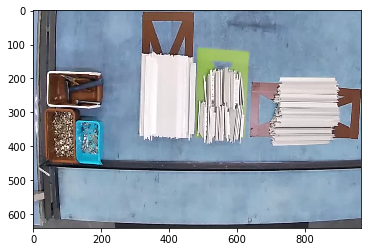

In [9]:
#print slika1
img = cv2.imread("slika1.jpg")
plt.imshow(img)

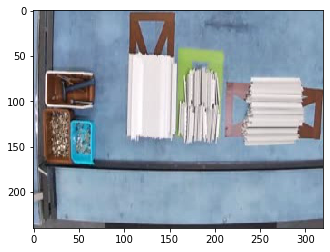

In [10]:
img2 = cv2.imread("slika2.jpg")
plt.imshow(img2)

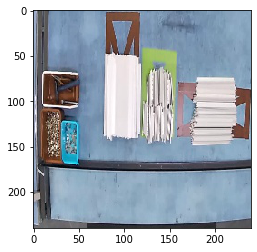

In [12]:
#Kako to izgleda kada napravimo da dimenzije wxh budu iste
slika3 = cv2.imread('C:\\Users\\Public\\Test_slike\\GH010007_8.jpg')
slika3 = cv2.resize(slika1, (240,240))
cv2.imwrite("slika3.jpg", slika3)

img3 = cv2.imread("slika3.jpg")
plt.imshow(img3)